In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = os.path.join("data", "mouse_drug_data.csv")
clinical_trial_data_to_load = os.path.join("data", "clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_clinical_trial = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID" )

# Display the data table for preview
mouse_clinical_trial


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_time_group = mouse_clinical_trial.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
mean_tumor_volume = pd.DataFrame(drug_time_group["Tumor Volume (mm3)"].mean()).reset_index()

# Preview DataFrame
mean_tumor_volume.head(10)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
drug_time_group = mouse_clinical_trial.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
mean_tumor_volume_sem = pd.DataFrame(drug_time_group["Tumor Volume (mm3)"].sem()).reset_index()

# Preview DataFrame
mean_tumor_volume_sem.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_transposed = mean_tumor_volume.reset_index().pivot('Timepoint', 'Drug', "Tumor Volume (mm3)")

# Preview that Reformatting worked
mean_tumor_volume_transposed


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


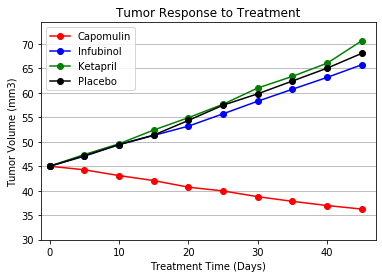

In [9]:
# Generate the Plot (with Error Bars)

#x_axis is time
x_time = mean_tumor_volume_transposed.index
# # x_time

#y_axis are different drugs
y_Capomulin = mean_tumor_volume_transposed.loc[:, "Capomulin"]
y_Infubinol = mean_tumor_volume_transposed.loc[:, "Infubinol"]
y_Ketapril = mean_tumor_volume_transposed.loc[:, "Ketapril"]
y_Placebo = mean_tumor_volume_transposed.loc[:, "Placebo"]

#Error Bars
eb_Capomulin = mean_tumor_volume_sem.loc[mean_tumor_volume_sem["Drug"] == "Capomulin", "Tumor Volume (mm3)"]
eb_Infubinol = mean_tumor_volume_sem.loc[mean_tumor_volume_sem["Drug"] == "Infubinol", "Tumor Volume (mm3)"]
eb_Ketapril = mean_tumor_volume_sem.loc[mean_tumor_volume_sem["Drug"] == "Ketapril", "Tumor Volume (mm3)"]
eb_Placebo = mean_tumor_volume_sem.loc[mean_tumor_volume_sem["Drug"] == "Placebo", "Tumor Volume (mm3)"]

#plot parameters
plt.xlim(-1.25, x_time.max()+2)
plt.ylim(mean_tumor_volume_transposed.min().min()-5, mean_tumor_volume_transposed.max().max()+3*1.25)

plt.xlabel("Treatment Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")

drug1_handle, = plt.plot(x_time, y_Capomulin, marker="o", color="red", label="Capomulin")
drug2_handle, = plt.plot(x_time, y_Infubinol, marker="o", color="blue", label="Infubinol")
drug3_handle, = plt.plot(x_time, y_Ketapril, marker="o", color="green", label="Ketapril")
drug4_handle, = plt.plot(x_time, y_Placebo, marker="o", color="black", label="Placebo")

plt.legend(handles=[drug1_handle, drug2_handle, drug3_handle, drug4_handle], loc="best")
plt.grid(axis='y')

# Save the Figure
plt.savefig("../Images/TumorTreatmentPlot.png")

In [10]:
#Need error bars  working here
# plt.errorbar(x_time, y_Placebo, marker="o", color="black", label="Placebo")

#mean_tumor_volume_sem.loc[mean_tumor_volume_sem["Drug"] == "Placebo", "Tumor Volume (mm3)"]

# eb_Capomulin = mean_tumor_volume_sem.loc[mean_tumor_volume_sem["Drug"] == "Capomulin", "Tumor Volume (mm3)"]
# eb_Capomulin 
# mean_tumor_volume_sem.columns
# mean_tumor_volume_sem.loc[mean_tumor_volume_sem["Drug"] == "Placebo", ["Tumor Volume (3mm)"]]

# df.loc[df['shield'] > 6, ['max_speed']]

## Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# drug_time_group.mean()

# Convert to DataFrame
mean_met_site = pd.DataFrame(drug_time_group["Metastatic Sites"].mean()).reset_index()

# Preview DataFrame
mean_met_site.head(10)


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
#drug_time_group = mouse_clinical_trial.groupby(["Drug", "Timepoint"])

# Convert to DataFrame

mean_metsite_sem = pd.DataFrame(drug_time_group["Metastatic Sites"].sem()).reset_index()

# Preview DataFrame
mean_metsite_sem.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [13]:
# Minor Data Munging to Re-Format the Data Frames
mean_metsite_transposed = mean_met_site.reset_index().pivot('Timepoint', 'Drug', "Metastatic Sites")

# Preview that Reformatting worked
mean_metsite_transposed


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


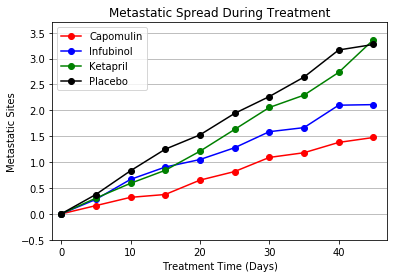

In [14]:
# Generate the Plot (with Error Bars)

#x_axis is time
x_time = mean_metsite_transposed.index
# # x_time

#y_axis are different drugs
y_Capomulin = mean_metsite_transposed.loc[:, "Capomulin"]
y_Infubinol = mean_metsite_transposed.loc[:, "Infubinol"]
y_Ketapril = mean_metsite_transposed.loc[:, "Ketapril"]
y_Placebo = mean_metsite_transposed.loc[:, "Placebo"]

#Error Bars
eb_Capomulin = mean_metsite_sem.loc[mean_metsite_sem["Drug"] == "Capomulin", "Metastatic Sites"]
eb_Infubinol = mean_metsite_sem.loc[mean_metsite_sem["Drug"] == "Infubinol", "Metastatic Sites"]
eb_Ketapril = mean_metsite_sem.loc[mean_metsite_sem["Drug"] == "Ketapril", "Metastatic Sites"]
eb_Placebo = mean_metsite_sem.loc[mean_metsite_sem["Drug"] == "Placebo", "Metastatic Sites"]

#plot parameters
plt.xlim(-1.25, x_time.max()+2)
plt.ylim(mean_metsite_transposed.min().min()-.50, mean_metsite_transposed.max().max()*1.1)

plt.xlabel("Treatment Time (Days)")
plt.ylabel("Metastatic Sites")
plt.title("Metastatic Spread During Treatment")

drugmet1_handle, = plt.plot(x_time, y_Capomulin, marker="o", color="red", label="Capomulin")
drugmet2_handle, = plt.plot(x_time, y_Infubinol, marker="o", color="blue", label="Infubinol")
drugmet3_handle, = plt.plot(x_time, y_Ketapril, marker="o", color="green", label="Ketapril")
drugmet4_handle, = plt.plot(x_time, y_Placebo, marker="o", color="black", label="Placebo")

plt.legend(handles=[drugmet1_handle, drugmet2_handle, drugmet3_handle, drugmet4_handle], loc="best")
plt.grid(axis='y')

# Save the Figure
plt.savefig("../Images/MetastaticSpreadPlot.png")

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
#mouse_clinical_trial.head()

# # Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count_group = mouse_clinical_trial.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count_group["Mouse ID"].count())

# # Preview DataFrame
mice_count_df .head()


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [16]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame

# Minor Data Munging to Re-Format the Data Frames
mice_count_transposed = mice_count_df.reset_index().pivot('Timepoint', 'Drug', "Mouse ID")

# Preview that Reformatting worked
mice_count_transposed


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


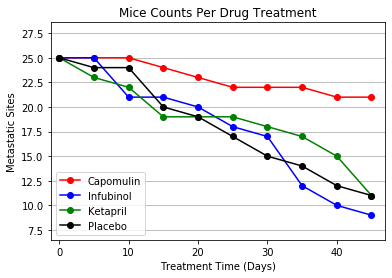

In [17]:
# Generate the Plot (Accounting for percentages)


#x_axis is time
x_time = mice_count_transposed.index
# # x_time

#y_axis are different drugs
m_Capomulin = mice_count_transposed.loc[:, "Capomulin"]
m_Infubinol = mice_count_transposed.loc[:, "Infubinol"]
m_Ketapril = mice_count_transposed.loc[:, "Ketapril"]
m_Placebo = mice_count_transposed.loc[:, "Placebo"]

#Error Bars
eb_Capomulin = mean_metsite_sem.loc[mean_metsite_sem["Drug"] == "Capomulin", "Metastatic Sites"]
eb_Infubinol = mean_metsite_sem.loc[mean_metsite_sem["Drug"] == "Infubinol", "Metastatic Sites"]
eb_Ketapril = mean_metsite_sem.loc[mean_metsite_sem["Drug"] == "Ketapril", "Metastatic Sites"]
eb_Placebo = mean_metsite_sem.loc[mean_metsite_sem["Drug"] == "Placebo", "Metastatic Sites"]

#plot parameters
plt.xlim(-1.25, x_time.max()+2)
plt.ylim(mice_count_transposed.min().min()-.50, mice_count_transposed.max().max()*1.1)

plt.xlabel("Treatment Time (Days)")
plt.ylabel("Metastatic Sites")
plt.title("Mice Counts Per Drug Treatment")

drugmet1_handle, = plt.plot(x_time, m_Capomulin, marker="o", color="red", label="Capomulin")
drugmet2_handle, = plt.plot(x_time, m_Infubinol, marker="o", color="blue", label="Infubinol")
drugmet3_handle, = plt.plot(x_time, m_Ketapril, marker="o", color="green", label="Ketapril")
drugmet4_handle, = plt.plot(x_time, m_Placebo, marker="o", color="black", label="Placebo")

plt.legend(handles=[drugmet1_handle, drugmet2_handle, drugmet3_handle, drugmet4_handle], loc="best")
plt.grid(axis='y')

# Save the Figure
plt.savefig("../Images/MiceCountPlot.png")
# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [18]:
### I tried using .pct_change but could never get it to work. 
### After too much time spent on this, I just used the first time value and last time value.
### I don't think this is the way to do this, but i needed to get through it.
### Is there a better way of doing this?

# Calculate the percent changes for each drug

#assign mean values to a data frame
summary_group_df = pd.DataFrame(mouse_clinical_trial.groupby(["Drug", "Timepoint"]).mean()).reset_index()
summary_group_df

#Find the volumes of the first and last time frames
time0_df = pd.DataFrame(summary_group_df.loc[(summary_group_df["Timepoint"] == 0), ["Drug", "Tumor Volume (mm3)"]]).set_index("Drug")
time0_df

time45_df = pd.DataFrame(summary_group_df.loc[(summary_group_df["Timepoint"] == 45), ["Drug", "Tumor Volume (mm3)"]]).set_index("Drug")
time45_df

# Merge the 2 time frames to perform the percent change calculation
time_merge_df = pd.merge(time0_df, time45_df, on="Drug", how="outer", suffixes=("_0", "_45"))
time_merge_df["Percent Change"] = ((time_merge_df["Tumor Volume (mm3)_45"] - time_merge_df["Tumor Volume (mm3)_0"]) /
                                    time_merge_df["Tumor Volume (mm3)_0"])*100

time_merge_reset_df = time_merge_df.reset_index()

# Display the data to confirm
time_merge_reset_df.loc[: , ["Drug","Percent Change"]]

,Drug,Percent Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


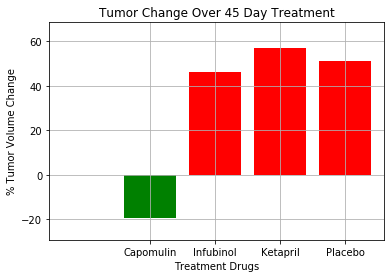

In [19]:
# Store all Relevant Percent Changes into a Tuple

time_merge_reset_df["drugs_to_pctchg"] = time_merge_reset_df[["Drug","Percent Change"]].apply(tuple, axis=1)
tm_data = time_merge_reset_df.loc[(time_merge_reset_df["Drug"].isin(["Capomulin", "Infubinol", "Ketapril", "Placebo"])),:].reset_index(drop="True")


# Splice the data between passing and failing drugs
pctchg = tm_data["Percent Change"]

increase_chg = []
for x in pctchg:
    if x > 0.00:
       increase_chg.append(x)
    else:
        increase_chg.append(0)

decrease_chg = []
for x in pctchg:
    if x <= 0.00:
       decrease_chg.append(x)
    else:
        decrease_chg.append(0)


# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls

drugname = tm_data["Drug"]
x_axis = np.arange(len(pctchg))

fig, ax = plt.subplots()

bar_width = 0.8
opacity = 1.0

r1 = ax.bar(x_axis + bar_width, decrease_chg, bar_width, alpha=opacity, color="g", align="center")
r2 = ax.bar(x_axis + bar_width, increase_chg, bar_width, alpha=opacity, color="r", align="center")

plt.xlim(-0.75, len(x_axis)+.40)
plt.ylim(min(pctchg)*1.50, max(pctchg)*1.20)
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Treatment Drugs")
plt.ylabel("% Tumor Volume Change")
plt.xticks(x_axis + bar_width, drugname)
plt.grid()   

# Save the Figure
plt.savefig("../Images/SummaryBarGraph.png")

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

In [1]:
# Observations  - Lyna Olivares
#
#  1.  The drug Capomulin is the overall better drug treatment with the best survival rate and largest descrease 
#      in metastatic spread. 
#
#  2.  The drug Ketapril performed worse than the Placebo, which would make it worse to receive treatment than 
#      to not receive any treatment.
#
#  3.  The drugs Infubinol and Ketapril performed similiar to the Placebo.  Other durgs should ananlyzed.